In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# 0. Monte Carlo method

Although the idea is to use genetic algorithms, Monte Carlo method has been widely used to optimize functions (amongst other related topics in engineering). In the next example, $\pi$ will be obtained trough using points in the $x, y = [0, 1]$ square, taking those which are inside the unit circle and using them to obtain the value of $\pi$. The idea is compare the area that points will fill:

$$
\dfrac{A_{{circ/4}}}{A_{sq}} = \dfrac{\frac{(\pi r^2)}{4}}{l^2} = \dfrac{\frac{\pi 1^2}{4}}{1\cdot 1} = \dfrac{\pi}{4} \longrightarrow \pi = 4 \cdot \dfrac{A_{{circ/4}}}{A_{sq}} \longrightarrow \pi \simeq  4 \cdot \dfrac{\#pts_{{circ/4}}}{\#pts_{sq}} 
$$

In [2]:
circX = np.linspace(0,1,500)
circY = np.sqrt(1-circX**2)

In [3]:
def MonteCarlo (noPoints, plot):
    x = np.random.random(noPoints)
    y = np.random.random(noPoints)

    count = 0

    for i in range(noPoints):
        if x[i]**2 + y[i]**2 <= 1:
            count += 1

    appPi = (4*count/noPoints)
    error = abs(np.pi-appPi)/np.pi*100
    
    if plot == 'y':
        fig, ax = plt.subplots(1, figsize = (4,4), dpi = 100)
        ax.fill_between(circX, 0, circY, alpha = 0.3, color = 'r')
        ax.fill_between(circX, circY, 1, alpha = 0.3, color = 'b')
        ax.scatter(x, y, color='k', marker='.', s = 1)
        ax.set_title(r'#pts = %i    $\pi$ = %.4f    $\varepsilon$=%.1f %%' %(noPoints, appPi, error))
        ax.set_xlim([0,1.0])
        ax.set_ylim([0,1.0])
    else:
        return appPi

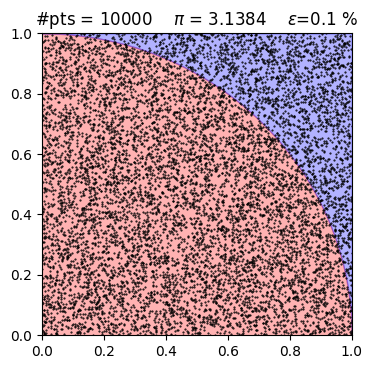

In [4]:
MonteCarlo(10000, 'y')

In [5]:
computedPi = np.zeros((25,50))
samples = np.logspace(1,5,np.shape(computedPi)[0])

for i in range(np.shape(computedPi)[0]):
    for j in range(np.shape(computedPi)[1]):
        computedPi[i,j] = MonteCarlo(int(samples[i]), 'n')

In [6]:
errorPi = abs(np.pi-computedPi)/np.pi*100

mean = np.zeros(np.shape(computedPi)[0])
meanPi = np.zeros(np.shape(computedPi)[0])
std = np.zeros(np.shape(computedPi)[0])
stdPi = np.zeros(np.shape(computedPi)[0])

for i in range(np.shape(computedPi)[0]):
    mean[i] = np.mean(errorPi[i,:])
    meanPi[i] = np.mean(computedPi[i,:])
    std[i] = np.std(errorPi[i,:])
    stdPi[i] = np.std(computedPi[i,:])

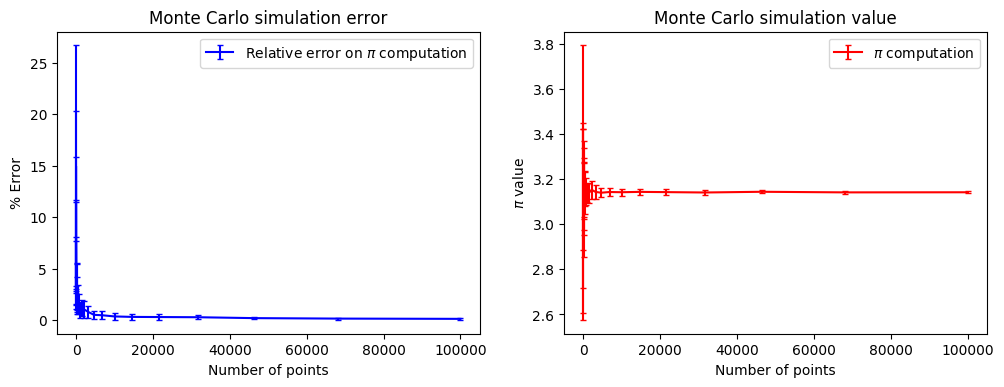

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4), dpi = 100)
ax1.errorbar(samples, mean, std, color='b', label='Relative error on $\pi$ computation', capsize = 2)
ax1.set_xlabel('Number of points')
ax1.set_ylabel('% Error')
ax1.set_title('Monte Carlo simulation error')
ax1.legend()
ax2.errorbar(samples, meanPi, stdPi, color='r', label='$\pi$ computation', capsize = 2)
ax2.set_xlabel('Number of points')
ax2.set_ylabel('$\pi$ value')
ax2.set_title('Monte Carlo simulation value')
ax2.legend()

(10.0, 1000.0)

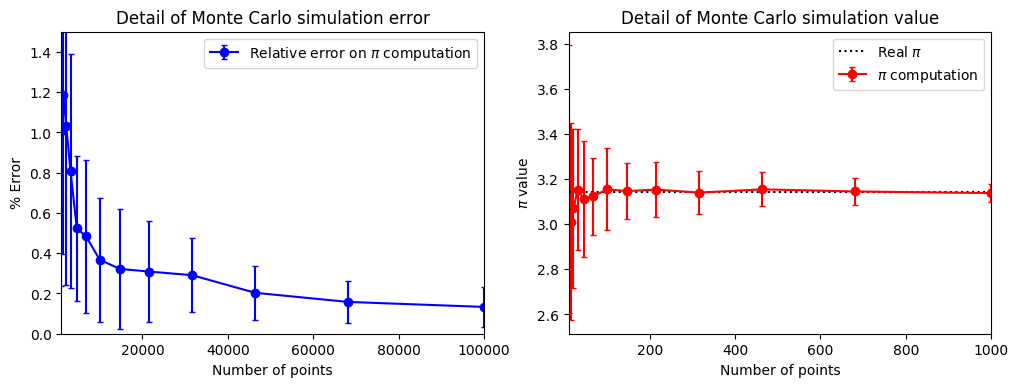

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4), dpi = 100)
ax1.errorbar(samples, mean, std, color='b', fmt = 'o-', label='Relative error on $\pi$ computation', capsize = 2)
ax1.set_xlabel('Number of points')
ax1.set_ylabel('% Error')
ax1.set_title('Detail of Monte Carlo simulation error')
ax1.legend()
ax1.set_ylim([0,1.5])
ax1.set_xlim([1e3,1e5])
ax2.errorbar(samples, meanPi, stdPi, color='r', fmt = 'o-', label='$\pi$ computation', capsize = 2)
ax2.plot([1e1,1e3],[np.pi,np.pi],'k:',label='Real $\pi$')
ax2.set_xlabel('Number of points')
ax2.set_ylabel('$\pi$ value')
ax2.set_title('Detail of Monte Carlo simulation value')
ax2.legend()
ax2.set_xlim([1e1,1e3])

# 1. Known function optimization - Monte Carlo approach

Knowing the value of $\pi$ is interesting but it is a simple problem. Let's try now to find the maximum value of a known function. Although in the CFD simulations the function will not be known, an input of points will fo through the function and will return the real value.

The code will be developed for:

$$
f(x, y) = \exp\left(-\dfrac{1}{3}x^3+x-y^2\right)
$$

and afterwards tried with some of the [typical optimization functions](https://en.wikipedia.org/wiki/Test_functions_for_optimization) to analyze performance. 

In [9]:
def function(x,y):
    return np.exp(-x**3/3+x-y**2)

A squared grid is created to evaluate the fucntion. It can be seen that the function has a LOCAL maximum value at $(1,0)$, but it has some other maximums in the $-x$ direction. This will include some instabilities in the computational process.

Text(0.5,1,'Contour Plot')

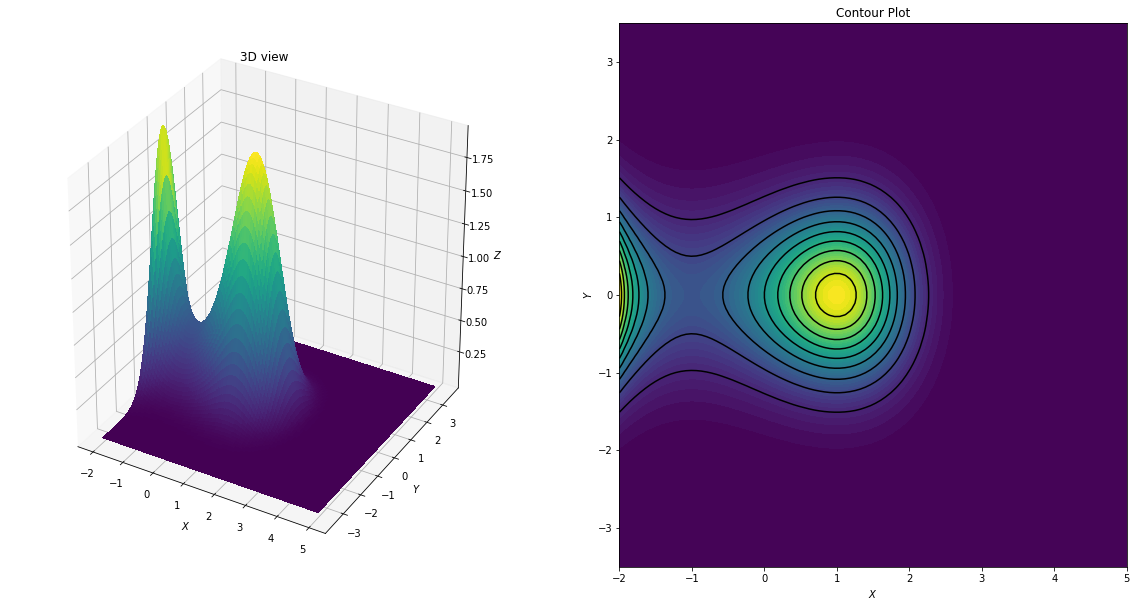

In [10]:
x = np.linspace(-2,5,100)
y = np.linspace(-3.5,3.5,100)
X, Y = np.meshgrid(x,y)

Z = function(X, Y)

levels = 50

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = cm.viridis, linewidth = 0, antialiased = False)
ax1.set_xlabel('$X$')
ax1.set_ylabel('$Y$')
ax1.set_zlabel('$Z$')
ax1.set_title('3D view')
ax2 = fig.add_subplot(1, 2, 2)
ax2.contourf(X, Y, Z, levels, cmap = cm.viridis, antialiased = False)
ax2.contour(X, Y, Z, int(levels/5) if levels>10 else 10, colors='k')
ax2.set_xlabel('$X$')
ax2.set_ylabel('$Y$')
ax2.set_title('Contour Plot')

In [11]:
def classical_MC_optimization (function, noPoints, x, y, X, Y, Z, plotOp, savePlot):
    #Random distributed grid with the specified number of points
    xi = np.random.uniform(x[0], x[-1], noPoints)
    yi = np.random.uniform(y[0], y[-1], noPoints)
    
    #Real value of the function
    zi = function(xi,yi)
    
    #The maximum point is choosen as the better one to perform the error calculation
    error = abs(function(xi[np.argsort(zi)[-1:]],yi[np.argsort(zi)[-1:]])-function(1,0))
    
    #Plotting section of the function if desired   
    if plotOp == 'y' or plotOp == 'yes':
        fig, ax = plt.subplots(figsize=((4, 4)), dpi=100)
        plt.subplot(1, 1, 1)
        plt.contourf(X, Y, Z, 10, cmap = cm.binary)
        plt.plot(xi,yi,'b.',markersize = 2)
        plt.scatter(xi[np.argsort(zi)[-1:]],yi[np.argsort(zi)[-1:]],color='r',s = 50)
        plt.xlabel('$X$')
        plt.ylabel('$Y$')
        plt.xlim(x[0], x[-1])
        plt.ylim(y[0], y[-1])
        plt.title('Monte Carlo simulation, $\epsilon$=%.4f' %(error)) 
    
    if savePlot == 'y' or savePlot == 'yes':
        plt.savefig('classicalMCsimulation.png', bbox_inches = 'tight', dpi=200)
    
    return error

array([ 0.13363019])

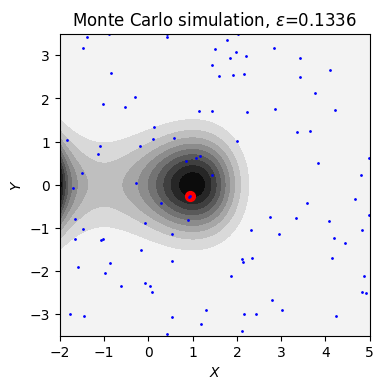

In [12]:
classical_MC_optimization(function, 100, x, y, X, Y, Z, 'yes', 'no')

A set of simulations will be carried out to know the performance of this method. Points will go from 10 to 100 and the error for each simulation will be computed. The total number of evaluations will be the same as the initial number of points.

In [13]:
initialPointsClassicalMC = np.logspace(1,4,100)
cMCopt = np.zeros((len(initialPointsClassicalMC),100,1)) #[initial points, simulations, function_outputs]

for h in range(np.shape(cMCopt)[0]):
    for i in range(np.shape(cMCopt)[1]):
            cMCopt[h,i,:] = classical_MC_optimization(function, int(initialPointsClassicalMC[h]), x, y, X, Y, Z, 'nope', 'nope')

In [14]:
cMCopt_error = np.zeros((np.shape(cMCopt)[0], 2)) #[initial points, (EVmean, EVstd)]

for h in range(np.shape(cMCopt)[0]):
        cMCopt_error[h,0] = np.mean(cMCopt[h,:,0])
        cMCopt_error[h,1] = np.std(cMCopt[h,:,0])

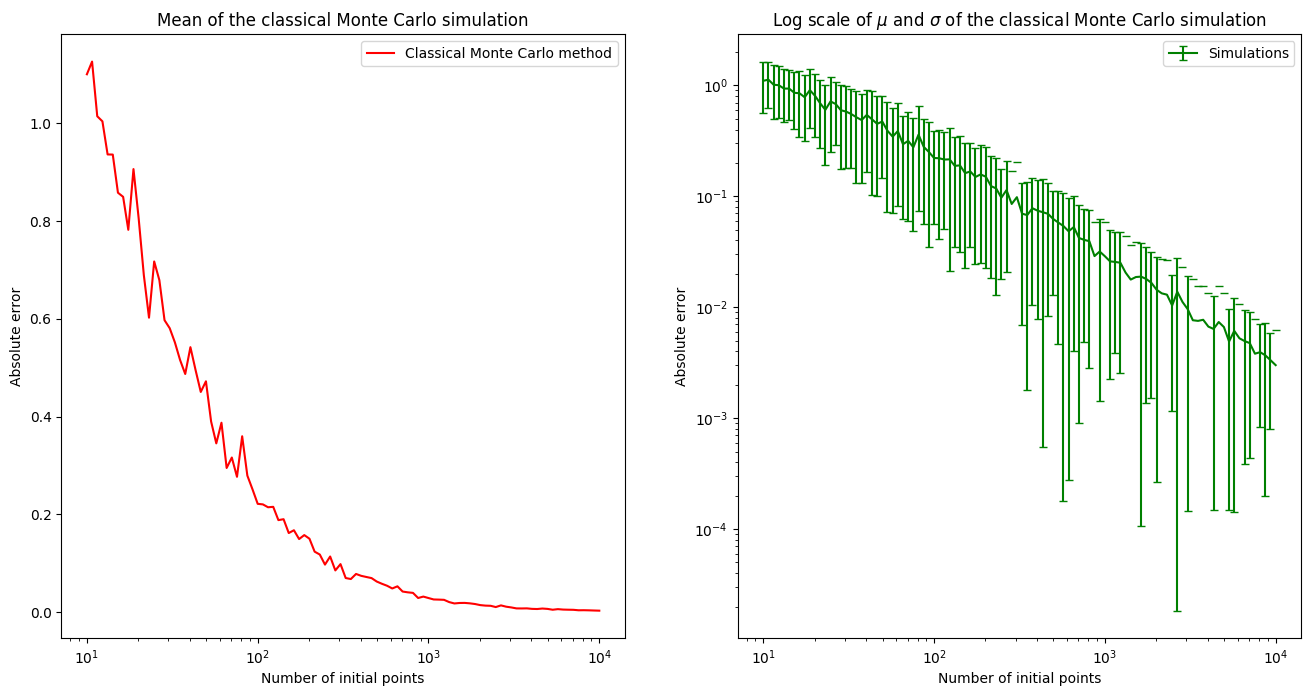

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=((16,8)), dpi = 100)

ax1.set_xscale("log")
ax1.plot(initialPointsClassicalMC, cMCopt_error[:,0], color = 'r', label=r'Classical Monte Carlo method')
ax1.set_xlabel('Number of initial points')
ax1.set_ylabel('Absolute error')
ax1.set_title('Mean of the classical Monte Carlo simulation')
ax1.legend()

ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.errorbar(initialPointsClassicalMC, cMCopt_error[:,0], cMCopt_error[:,1], color = 'g', capsize = 3, label=r'Simulations')
ax2.set_xlabel('Number of initial points')
ax2.set_ylabel('Absolute error')
ax2.set_title('Log scale of $\mu$ and $\sigma$ of the classical Monte Carlo simulation')
ax2.legend()

It can be seen that error is not to high, but in order to achieve high precission, the required number of evaluations (intial points) must be above <tt> 10e3 </tt>.

# 2. Known function optimization - Monte Carlo optimized approach

If instead of throwing an incredibly enormous number of points to luckily hit the maximum, a more intelligent approach can be made. Using the Monte Carlo method for an initial set of points, if the best points of the $i$ generation are choosen to create a normal distribution in 2D (with $\mu$ and $\sigma$), the points of generation $i+1$ can be created from both random and normal distribution, reaching eventualy the desired precision.

In [16]:
def MC_optimization (function, noPoints, tol, genLim, x, y, X, Y, Z, plotOp, savePlot):
    #Define the number of generations as zero and the limit of generations    
    gen = 1

    #Random distributed grid with the specified number of points
    xi = np.random.uniform(x[0], x[-1], noPoints)
    yi = np.random.uniform(y[0], y[-1], noPoints)
    #Real value of the function
    zi = function(xi,yi)
    
    #Take the best specimenes from the sample. The number of points to choose is described by:
    selectPoints = int(round((noPoints/2.5)*(np.tanh(gen/10-1)+1)))
    #If only one point is choosen, mean and convariance are not feasible
    if selectPoints <= 1 : selectPoints = 2 
    #Points are ordered and the 'selectPoints' maximum values are choosen
    xbest = xi[np.argsort(zi)[-selectPoints:]]
    ybest = yi[np.argsort(zi)[-selectPoints:]]

    #Compute the mean and covariance of the best selected data
    mean = np.array([np.mean(xbest), np.mean(ybest)])
    cov = np.cov(xbest,ybest)
    
    #With the mean and covariance values, a multivariate_normal distribution is used
    normal = np.random.multivariate_normal(mean, cov, selectPoints)

    #Let's compute the error to establish a stop criteria
    error = abs(function(xi[np.argsort(zi)[-1:]],yi[np.argsort(zi)[-1:]])-function(1,0))
    
    #Plotting section of the function (if desired) 
    if plotOp == 'y' or plotOp == 'yes':
        fig, ax = plt.subplots(figsize=(20, 4*int(np.ceil(genLim/5))), dpi=100)
        plt.subplot(int(np.ceil(genLim/5)), 5, gen)
        plt.contourf(X, Y, Z, 10, cmap = cm.binary)
        plt.plot(xi,yi,'b.',markersize = 2)
        plt.scatter(xi[np.argsort(zi)[-selectPoints:]],yi[np.argsort(zi)[-selectPoints:]],color='g',s =50)
        plt.scatter(xi[np.argsort(zi)[-1:]],yi[np.argsort(zi)[-1:]],color='r',s = 50)
        plt.xlabel('$X$')
        plt.ylabel('$Y$')
        plt.xlim(x[0], x[-1])
        plt.ylim(y[0], y[-1])
        plt.title('%i-th generation, $\epsilon$=%.4f' %(gen, error))      

    #While-loop to perform either the number of generations or until the tolerance is reached
    while error > tol and gen < genLim:
        #Let's use the new created generation
        gen += 1
    
        #Random distributed grid with the specified number of points
        xi = np.concatenate([np.random.uniform(x[0], x[-1], noPoints-selectPoints), normal[:,0]])
        yi = np.concatenate([np.random.uniform(y[0], y[-1], noPoints-selectPoints), normal[:,1]])
        #Real value of the function
        zi = function(xi,yi)

        #Take the best specimenes from the sample. The number of points to choose is described by:
        selectPoints = int(round((noPoints/2.5)*(np.tanh(gen/10-1)+1)))
        if selectPoints <= 1 : selectPoints = 2 
        xbest = xi[np.argsort(zi)[-selectPoints:]]
        ybest = yi[np.argsort(zi)[-selectPoints:]]

        #Compute the mean and covariance of the best selected data
        mean = np.array([np.mean(xbest), np.mean(ybest)])
        cov = np.cov(xbest,ybest)

        #With the mean and covariance values, a multivariate_normal distribution is used
        normal = np.random.multivariate_normal(mean, cov, selectPoints)

        #Let's compute the error to establish a stop criteria
        error = abs(function(xi[np.argsort(zi)[-1:]],yi[np.argsort(zi)[-1:]])-function(1,0))

        #Plotting section of the function    
        if plotOp == 'y' or plotOp == 'yes':
            plt.subplot(int(np.ceil(genLim/5)), 5, gen)
            plt.contourf(X, Y, Z, 10, cmap = cm.binary)
            plt.plot(xi,yi,'b.',markersize = 2)
            plt.scatter(xi[np.argsort(zi)[-selectPoints:]],yi[np.argsort(zi)[-selectPoints:]],color='g',s = 50)
            plt.scatter(xi[np.argsort(zi)[-1:]],yi[np.argsort(zi)[-1:]],color='r',s = 50)
            plt.xlabel('$X$')
            plt.ylabel('$Y$')
            plt.xlim(x[0], x[-1])
            plt.ylim(y[0], y[-1])
            plt.title('%i-th generation, $\epsilon$=%.4f' %(gen, error)) 
    
    if savePlot == 'y' or savePlot == 'yes':
        plt.savefig('optimizedMCsimulation.png', bbox_inches = 'tight', dpi=200)
        
    #Return the value of generations and the obtained error
    return gen, error

(17, array([  4.27663809e-05]))

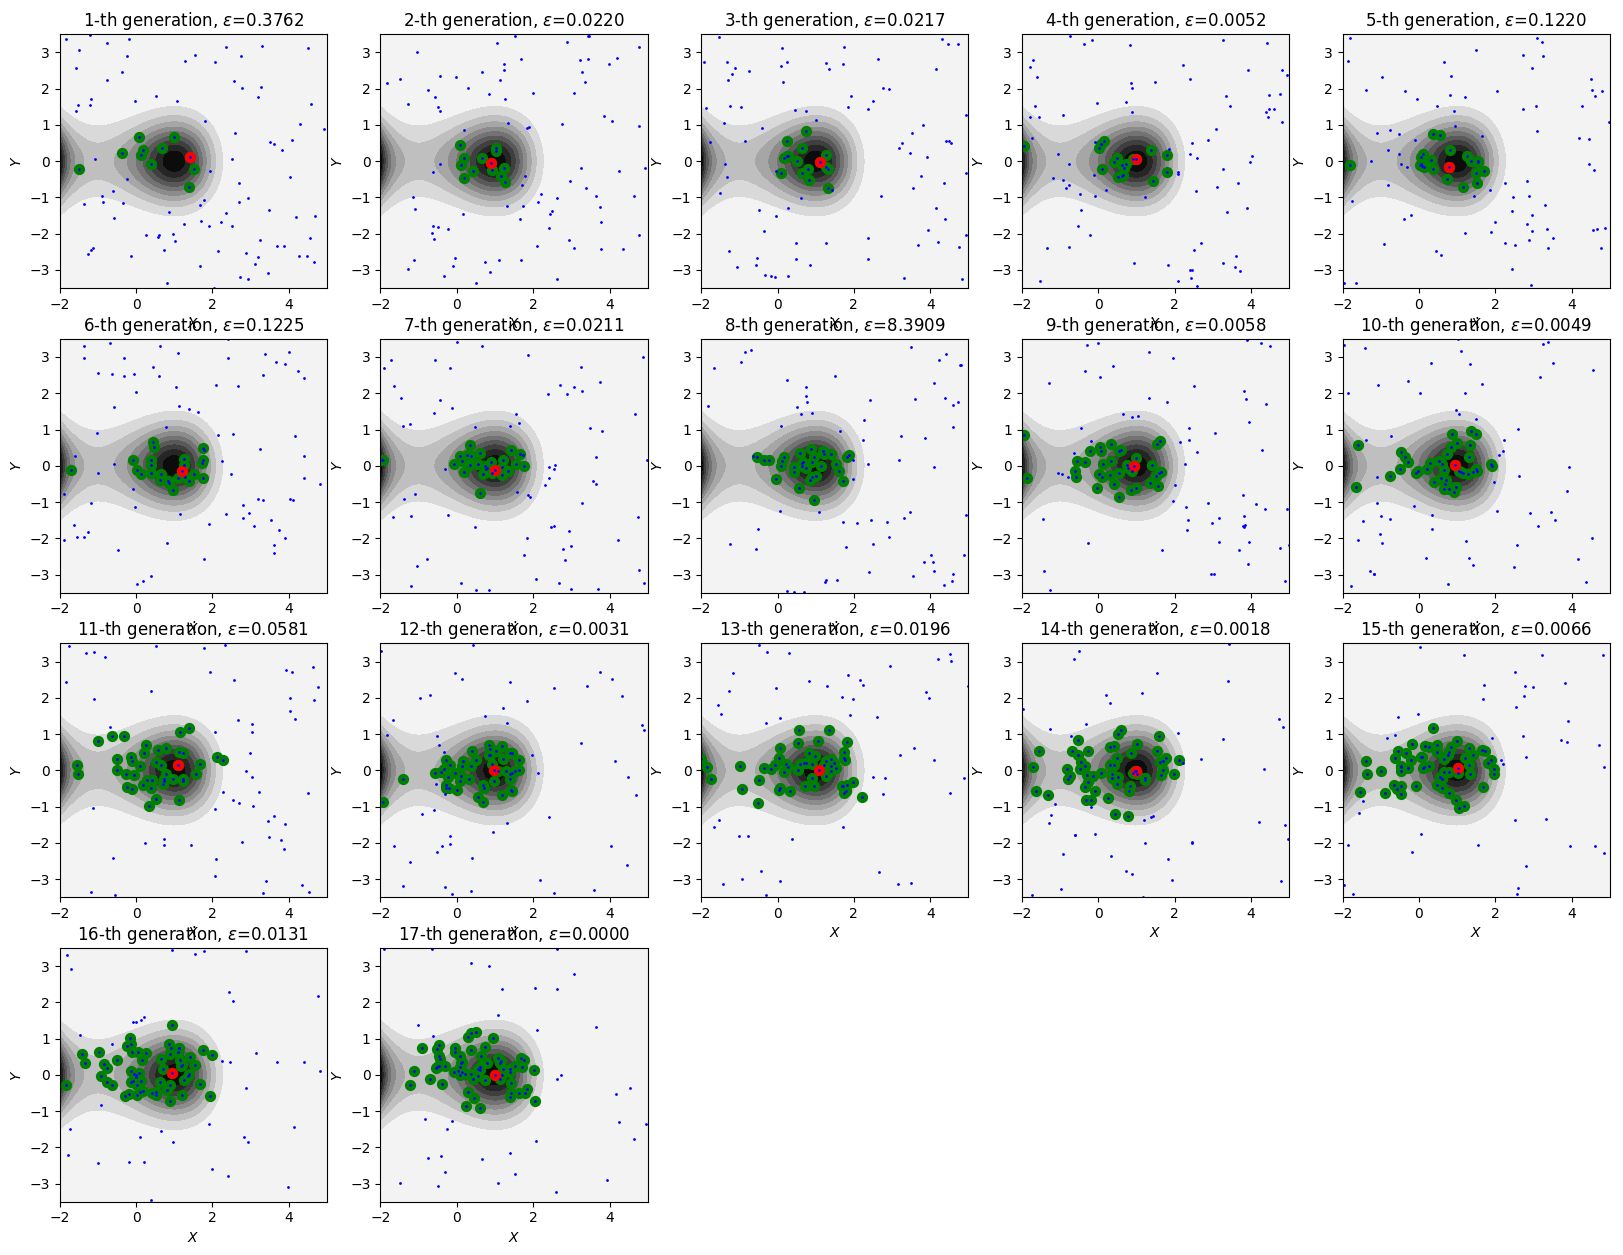

In [17]:
MC_optimization(function, 100, 1e-3, 100, x, y, X, Y, Z, 'yes', 'no')

Before moving into other functions, a group of simulatiosn will be made to see if there is an optimum point with the minimum number of evaluations - for reduce to the minimum the number of CFD simulations that should be carried out. 100 Monte Carlo simulations will be made for each error. If the simulation returns a <tt> genLim </tt> - i.e. it has not been suscessful - the results will be deprecated.

In [18]:
initialPointsLP = np.linspace(10,100,10)
MCopt = np.zeros((len(initialPointsLP),5,100,2)) #[initial points, tolerance, simulations, function_outputs]
genLim = 500

for h in range(np.shape(MCopt)[0]):
    for i in range(np.shape(MCopt)[1]):
        for j in range(np.shape(MCopt)[2]):
            MCopt[h,i,j,:] = MC_optimization(function, int(initialPointsLP[i]), 1*10**(-i), genLim, x, y, X, Y, Z, 'nope', 'nope')

print('%i attempts in which the number of generations was reached before the tolerance' %sum(sum(sum(MCopt[:,:,:,0]==genLim))))

/home/jlobatop/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


130 attempts in which the number of generations was reached before the tolerance


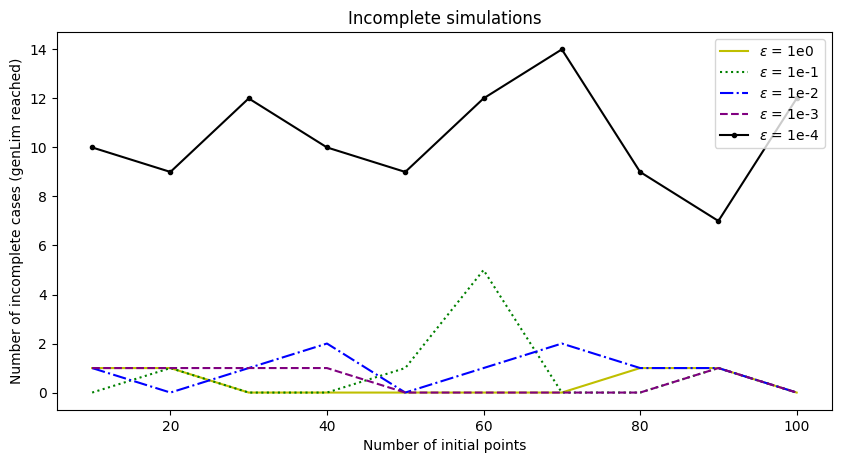

In [19]:
fig, ax1 = plt.subplots(1, figsize=((10,5)), dpi = 100)
ax1.plot(initialPointsLP, np.sum(MCopt[:,0,:,0] == genLim, axis=1), '-', color = 'y', label=r'$\epsilon$ = 1e0')
ax1.plot(initialPointsLP, np.sum(MCopt[:,1,:,0] == genLim, axis=1), ':', color = 'g', label=r'$\epsilon$ = 1e-1')
ax1.plot(initialPointsLP, np.sum(MCopt[:,2,:,0] == genLim, axis=1), '-.', color = 'b', label=r'$\epsilon$ = 1e-2')
ax1.plot(initialPointsLP, np.sum(MCopt[:,3,:,0] == genLim, axis=1), '--', color = 'purple', label=r'$\epsilon$ = 1e-3')
ax1.plot(initialPointsLP, np.sum(MCopt[:,4,:,0] == genLim, axis=1), '.-', color = 'k', label=r'$\epsilon$ = 1e-4')
ax1.set_xlabel('Number of initial points')
ax1.set_ylabel('Number of incomplete cases (genLim reached)')
ax1.set_title(r'Incomplete simulations')
ax1.legend()

In [20]:
MCopt[MCopt[:,:,:,0]==genLim] = False

MCopt_error = np.zeros((np.shape(MCopt)[0], np.shape(MCopt)[1], 2)) #[initial points, tolerance, (EVmean, EVstd, EVfail)]

for h in range(np.shape(MCopt)[0]):
    for i in range(np.shape(MCopt)[1]):
        MCopt_error[h,i,0] = np.mean(MCopt[h,i,:,0]*initialPointsLP[h])
        MCopt_error[h,i,1] = np.std(MCopt[h,i,:,0]*initialPointsLP[h])

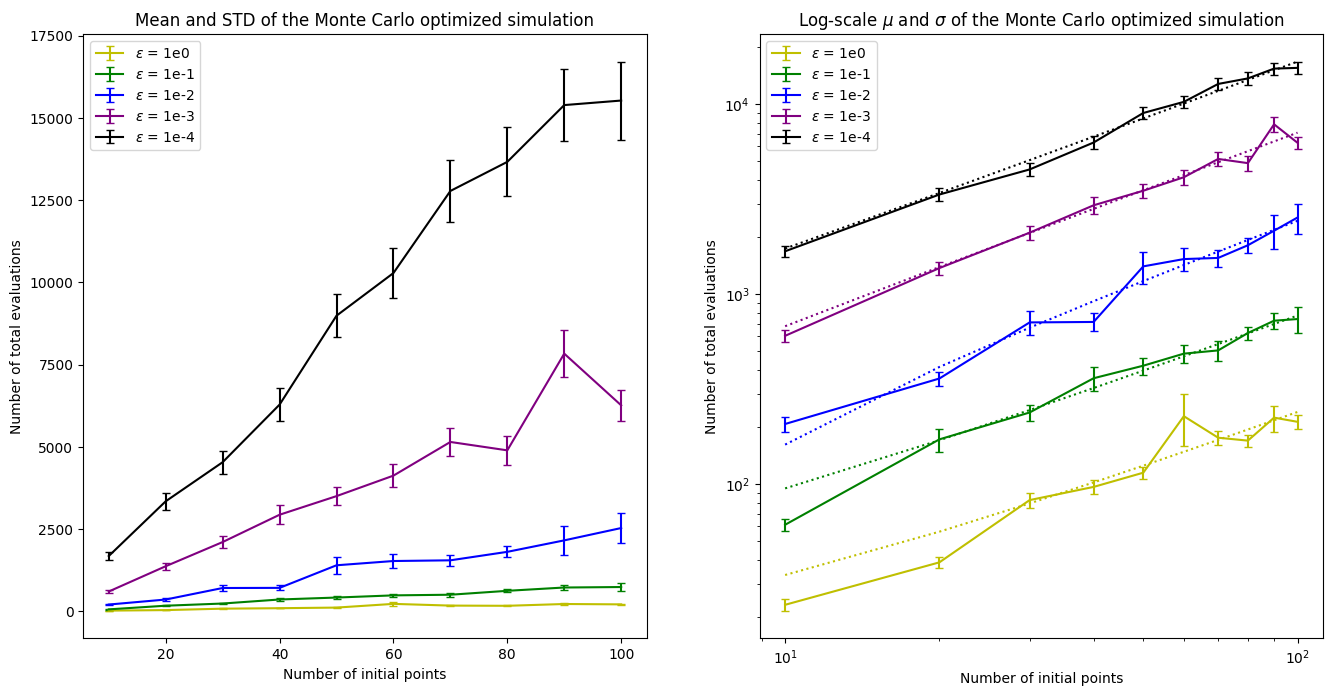

In [21]:
p0 = np.poly1d(np.polyfit(initialPointsLP, MCopt_error[:,0,0], 1))
p1 = np.poly1d(np.polyfit(initialPointsLP, MCopt_error[:,1,0], 1))
p2 = np.poly1d(np.polyfit(initialPointsLP, MCopt_error[:,2,0], 1))
p3 = np.poly1d(np.polyfit(initialPointsLP, MCopt_error[:,3,0], 1))
p4 = np.poly1d(np.polyfit(initialPointsLP, MCopt_error[:,4,0], 1))

interp0 = p0(initialPointsLP)
interp1 = p1(initialPointsLP)
interp2 = p2(initialPointsLP)
interp3 = p3(initialPointsLP)
interp4 = p4(initialPointsLP)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=((16,8)), dpi = 100)

ax1.errorbar(initialPointsLP, MCopt_error[:,0,0], 0.1*MCopt_error[:,0,1], color = 'y', capsize = 3, label=r'$\epsilon$ = 1e0')
ax1.errorbar(initialPointsLP, MCopt_error[:,1,0], 0.1*MCopt_error[:,1,1], color = 'g', capsize = 3, label=r'$\epsilon$ = 1e-1')
ax1.errorbar(initialPointsLP, MCopt_error[:,2,0], 0.1*MCopt_error[:,2,1], color = 'b', capsize = 3, label=r'$\epsilon$ = 1e-2')
ax1.errorbar(initialPointsLP, MCopt_error[:,3,0], 0.1*MCopt_error[:,3,1], color = 'purple', capsize = 3, label=r'$\epsilon$ = 1e-3')
ax1.errorbar(initialPointsLP, MCopt_error[:,4,0], 0.1*MCopt_error[:,4,1], color = 'k', capsize = 3, label=r'$\epsilon$ = 1e-4')
ax1.set_xlabel('Number of initial points')
ax1.set_ylabel('Number of total evaluations')
ax1.set_title('Mean and STD of the Monte Carlo optimized simulation')
ax1.legend()

ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.errorbar(initialPointsLP, MCopt_error[:,0,0], 0.1*MCopt_error[:,0,1], color = 'y', capsize = 3, label=r'$\epsilon$ = 1e0')
ax2.plot(initialPointsLP, interp0,'y:')
ax2.errorbar(initialPointsLP, MCopt_error[:,1,0], 0.1*MCopt_error[:,1,1], color = 'g', capsize = 3, label=r'$\epsilon$ = 1e-1')
ax2.plot(initialPointsLP, interp1,'g:')
ax2.errorbar(initialPointsLP, MCopt_error[:,2,0], 0.1*MCopt_error[:,2,1], color = 'b', capsize = 3, label=r'$\epsilon$ = 1e-2')
ax2.plot(initialPointsLP, interp2,'b:')
ax2.errorbar(initialPointsLP, MCopt_error[:,3,0], 0.1*MCopt_error[:,3,1], color = 'purple', capsize = 3, label=r'$\epsilon$ = 1e-3')
ax2.plot(initialPointsLP, interp3,':', color='purple')
ax2.errorbar(initialPointsLP, MCopt_error[:,4,0], 0.1*MCopt_error[:,4,1], color = 'k', capsize = 3, label=r'$\epsilon$ = 1e-4')
ax2.plot(initialPointsLP, interp4,'k:')
ax2.set_xlabel('Number of initial points')
ax2.set_ylabel('Number of total evaluations')
ax2.set_title(r'Log-scale $\mu$ and $\sigma$ of the Monte Carlo optimized simulation')
ax2.legend()

Although there is not a trend in the data (and every time that the code is run, results will vary), some things can be extracted from the plots. First of all, it is worth using less initial points - even using more generations to achieve the result below tolerance. This is valid for all cases presented. It must also be noticed that the number of incomplete simulations is fairly low (below 5% of the cases) except when tolerance is lowered too much - having that it is not possible to reach the desired precision with that limit of generations. It has also be seen that when the number of incomplete simulations is taken out, the $\mu$ and $\sigma$ are more stable and follow the fitting of the curve better than when incomplete simulations are left in the calculations.

Let's finally compare the optimized Monte Carlo simulation and the classical Monte Carlo simulation. To do that, it can be compared with a fixed $\varepsilon$ (varying the number of poitns) or varying the error from <tt> 1e0 </tt> to <tt> 1e-4 </tt> (and fixing the number of initial poitns to the best value)

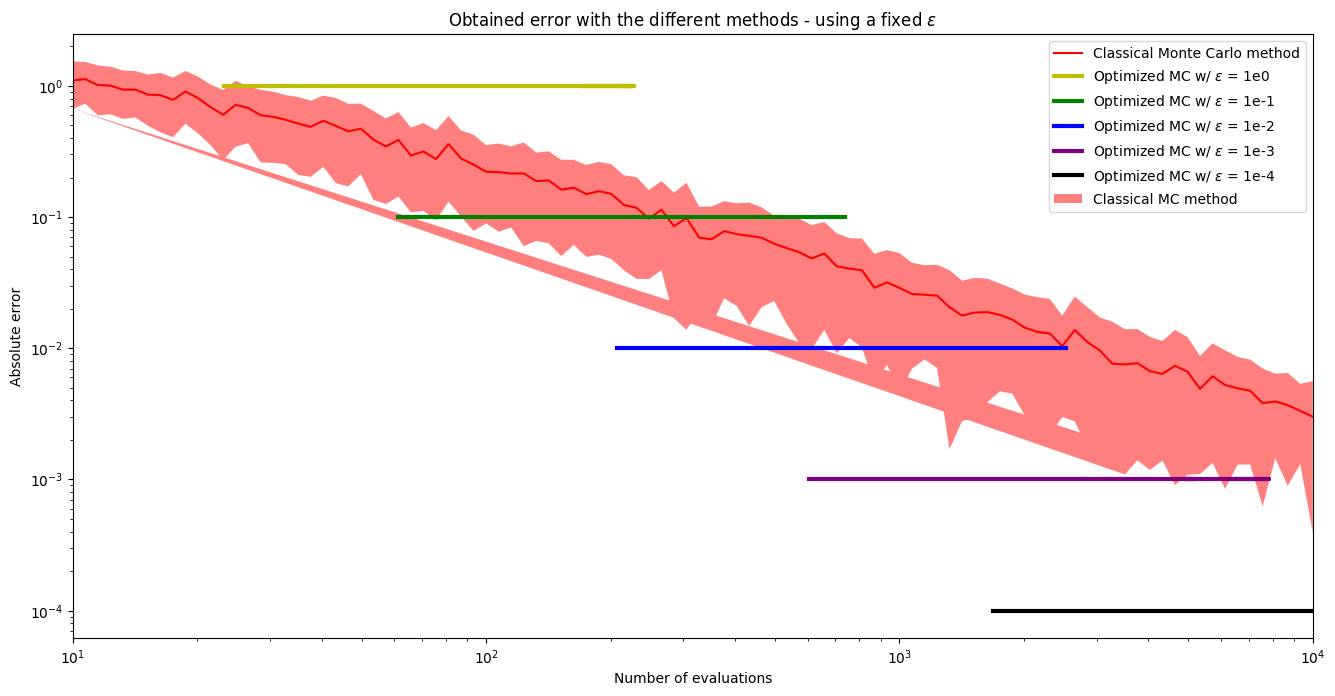

In [22]:
fig, (ax1) = plt.subplots(1, figsize=((16,8)), dpi = 100)

ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.plot(initialPointsClassicalMC, cMCopt_error[:,0], color = 'r', label=r'Classical Monte Carlo method')
ax1.fill_between(initialPointsClassicalMC, cMCopt_error[:,0]+0.8*cMCopt_error[:,1], cMCopt_error[:,0]-0.8*cMCopt_error[:,1], facecolor='red', alpha=0.5, label = 'Classical MC method')
ax1.plot(MCopt_error[:,0,0], 1e0*np.ones(len(MCopt_error[:,0,0])), color = 'y', linewidth = 3, label=r'Optimized MC w/ $\epsilon$ = 1e0')
ax1.plot(MCopt_error[:,1,0], 1e-1*np.ones(len(MCopt_error[:,1,0])), color = 'g', linewidth = 3, label=r'Optimized MC w/ $\epsilon$ = 1e-1')
ax1.plot(MCopt_error[:,2,0], 1e-2*np.ones(len(MCopt_error[:,2,0])), color = 'b', linewidth = 3, label=r'Optimized MC w/ $\epsilon$ = 1e-2')
ax1.plot(MCopt_error[:,3,0], 1e-3*np.ones(len(MCopt_error[:,3,0])), color = 'purple', linewidth = 3, label=r'Optimized MC w/ $\epsilon$ = 1e-3')
ax1.plot(MCopt_error[:,4,0], 1e-4*np.ones(len(MCopt_error[:,4,0])), color = 'k', linewidth = 3, label=r'Optimized MC w/ $\epsilon$ = 1e-4')
ax1.set_xlabel('Number of evaluations')
ax1.set_ylabel('Absolute error')
ax1.set_title(r'Obtained error with the different methods - using a fixed $\varepsilon$')
ax1.set_xlim([1e1,1e4])
ax1.legend()

In [23]:
allowableError = np.logspace(0.2,-4,25) #initial points will be always 10, because it gives the best results
MCvariableError = np.zeros((len(allowableError),50,2)) #[errors, simulations, function_outputs]
genLim = 1000 #not limitation by generation wants to be achieved - or at least not easily 

for h in range(np.shape(MCvariableError)[0]):
    for i in range(np.shape(MCvariableError)[1]):
        MCvariableError[h,i,:] = MC_optimization(function, 10, allowableError[h], genLim, x, y, X, Y, Z, 'nope', 'nope')

print('%i attempts in which the number of generations was reached before the tolerance' %sum(sum(sum(MCopt[:,:,:,0]==genLim))))

/home/jlobatop/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0 attempts in which the number of generations was reached before the tolerance


In [24]:
MCvariableError[MCvariableError[:,:,0] == genLim] = False

varEmc_error = np.zeros((np.shape(MCvariableError)[0], 2)) #[initial points, tolerance, (EVmean, EVstd)]

for h in range(np.shape(MCvariableError)[0]):
    varEmc_error[h,0] = np.mean(MCvariableError[h,:,0]*10)
    varEmc_error[h,1] = np.std(MCvariableError[h,:,0]*10)

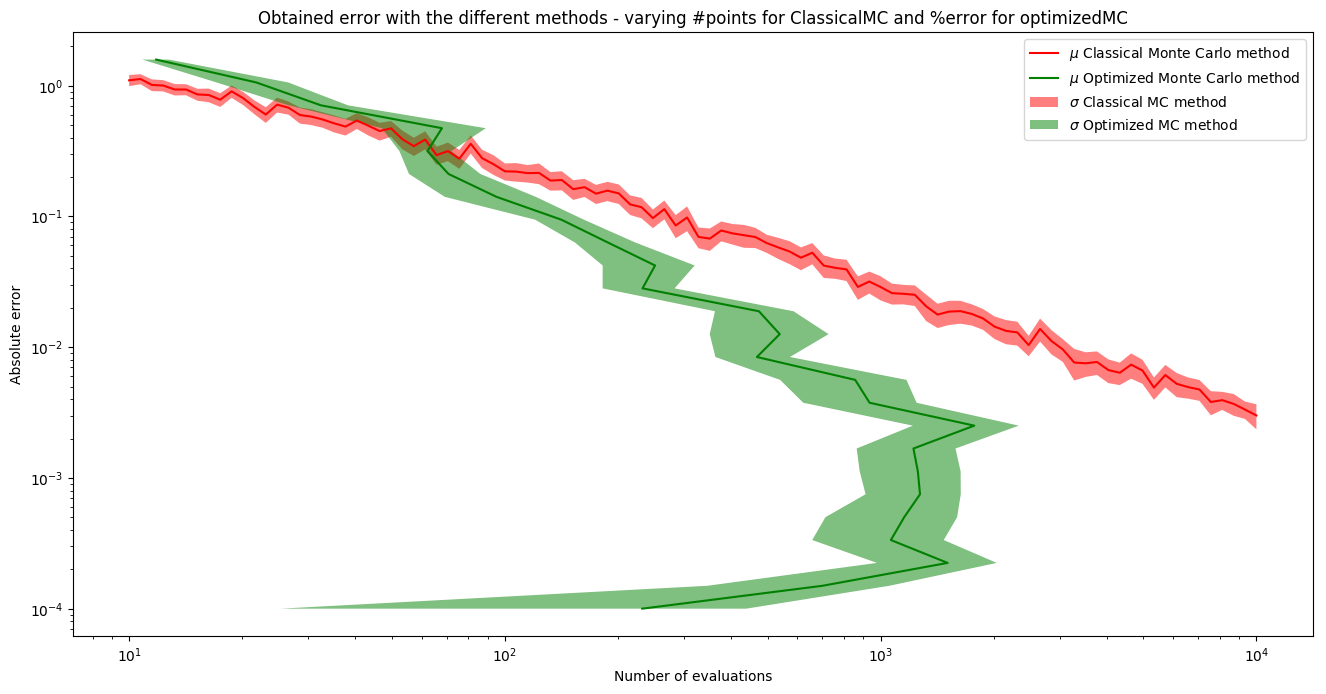

In [25]:
fig, (ax1) = plt.subplots(1, figsize=((16,8)), dpi = 100)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.plot(initialPointsClassicalMC, cMCopt_error[:,0], color = 'r', label=r'$\mu$ Classical Monte Carlo method')
ax1.fill_between(initialPointsClassicalMC, cMCopt_error[:,0]+0.2*cMCopt_error[:,1], cMCopt_error[:,0]-0.2*cMCopt_error[:,1], facecolor='red', alpha=0.5, label = r'$\sigma$ Classical MC method')
ax1.plot(varEmc_error[:,0], allowableError, color = 'g', label=r'$\mu$ Optimized Monte Carlo method')
ax1.fill_betweenx(allowableError[:], varEmc_error[:,0]+0.2*varEmc_error[:,1], varEmc_error[:,0]-0.2*varEmc_error[:,1], facecolor='g', alpha=0.5, label = r'$\sigma$ Optimized MC method')
ax1.set_xlabel('Number of evaluations')
ax1.set_ylabel('Absolute error')
ax1.set_title('Obtained error with the different methods - varying #points for ClassicalMC and %error for optimizedMC')
ax1.legend()

From <tt> 1e2 </tt> evaluations and so on it it better the optimized Monte Carrlo Method given that for the same number of evaluations, the error is smaller. 

# 3. Known function optimization - Genetic Algorithm approach